This section loads the best saved model and evaluates its performance on the held-out test set.

We use:
- A classification report to show precision, recall, F1-score, and accuracy
- A confusion matrix to visualize true vs. predicted labels

In [ ]:
# Load best model
model.load_state_dict(torch.load("best_resnet18.pth"))
model.eval()

# Collect predictions and true labels
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# Convert to arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Generate classification report
target_names = ['NONPD', 'PD']
print("Test Classification Report:")
print(classification_report(all_labels, all_preds, target_names=target_names))

Test Classification Report:
              precision    recall  f1-score   support

       NONPD       1.00      1.00      1.00         8
          PD       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



#Evaluate


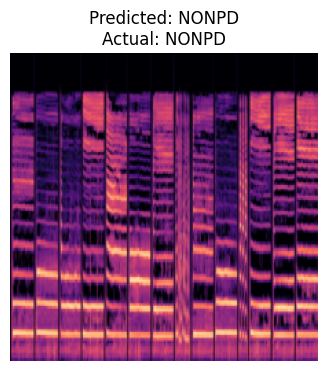

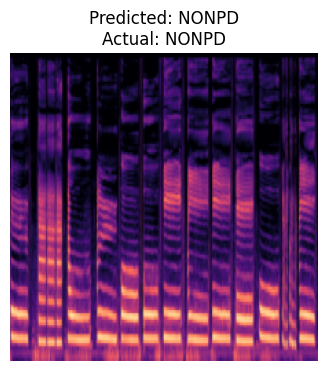

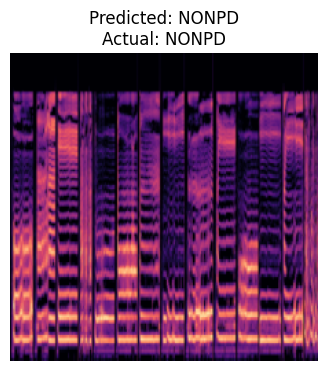

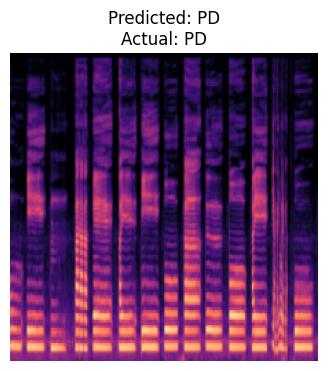

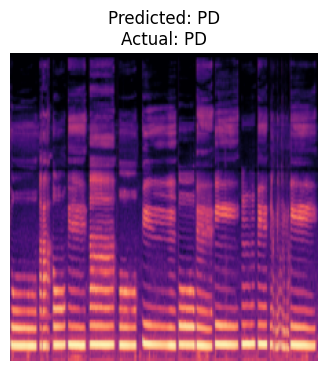

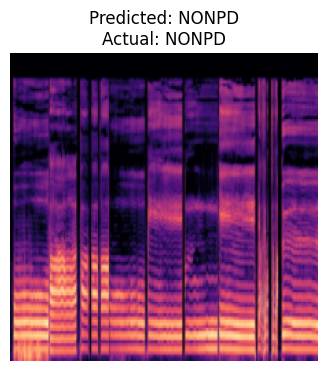

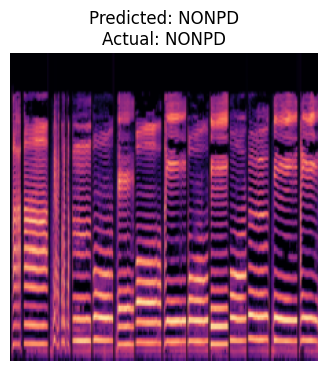

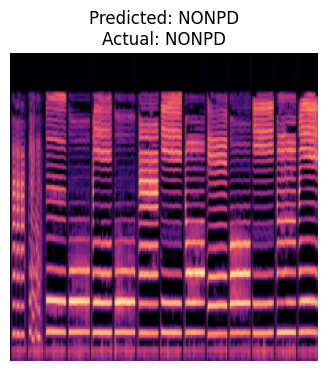

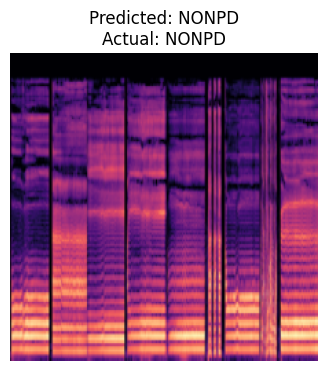

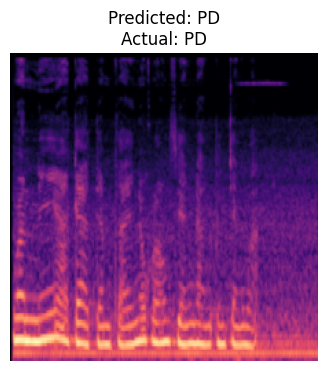

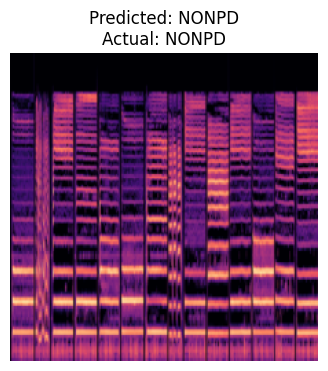

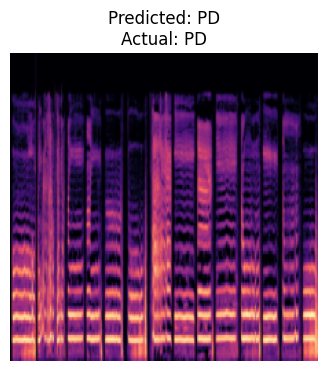

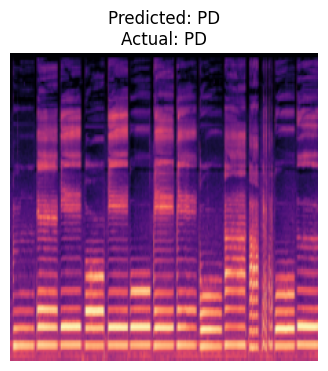

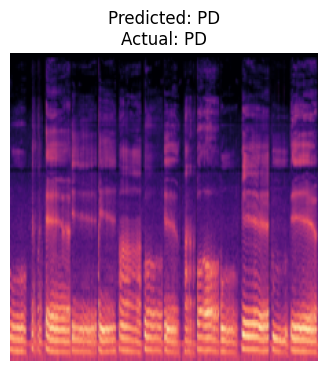

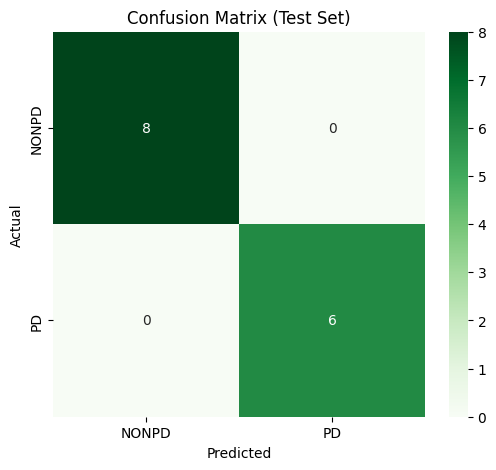

In [ ]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load best model
model.load_state_dict(torch.load("best_resnet18.pth"))
model.eval()

# Collect predictions and true labels
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.numpy())

# Generate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
target_names = ['NONPD', 'PD']

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()